## CHAPTER 5-6
This dataset represents a good database of books

In [3]:
#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplotlib.pyplot
import matplotlib.pyplot as plt

#for beautiful output
import seaborn as sns

In [4]:
#contains a large number of probability distributions
from scipy import stats
#scipy.stats contains objects that represent analytic distributions
import scipy.stats

In [5]:
#reading data via pandas read_csv()
data = pd.read_csv("books.csv", delimiter=',')

### all variables of the sample

bookID - A unique Identification number for each book

title - The name under which the book was published

authors - Names of the authors of the book. Multiple authors are delimited with -

average_rating - The average rating of the book received in total

isbn - Another unique number to identify the book, the International Standard Book Number

isbn13 - A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN

language_code - Helps understand what is the primary language of the book. For instance, eng is standard for English

#num_pages - Number of pages the book contains

ratings_count - Total number of ratings the book received

text_reviews_count - Total number of written text reviews the book received

#### Populating the interactive namespace from numpy and matplotlib

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### describe() description for numerical
a variety of summary statistics about a Series or the columns of a DataFrame
for each numerical (int64) column, the number of non-empty values (count)
number of mean values (mean)
standard deviation (std)
minimum (min)
maximum (max)
25 % and 75 % of the quartile
median (50%)

In [6]:
data.describe()

,bookID,average_rating,# num_pages,ratings_count,text_reviews_count
count,13719.000000,1.371900e+04,13719.000000,1.371900e+04,13718.000000
mean,22160.579270,6.208883e+04,342.377141,1.775909e+04,533.478787
std,13699.603351,7.271888e+06,252.623382,1.129371e+05,2528.653867
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,10621.000000,3.770000e+00,196.000000,8.250000e+01,7.000000
50%,21322.000000,3.960000e+00,301.000000,6.300000e+02,40.000000
75%,33322.000000,4.130000e+00,421.000000,4.737000e+03,222.000000
max,47709.000000,8.517427e+08,6576.000000,5.629932e+06,93619.000000


In [7]:
data.describe(include = 'object')

,title,authors,isbn,isbn13,language_code
count,13719,13719,13719,13719,13719
unique,12427,7605,13719,13719,31
top,One Hundred Years of Solitude,Agatha Christie,0241126274,9780393059168,eng
freq,11,69,1,1,10597


### describe() description for non-numerical
for each non-numerical (object, bool) column, the number of non-empty values (count)

number of unique values (unique)

the most frequent value (top)

frequency (freq)

### The .info() method prints 
information about a DataFrame including 
the index dtype and column dtypes
non-null values and memory usage

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null float64
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null int64
ratings_count         13719 non-null int64
text_reviews_count    13718 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


In [4]:
#dropping data with NaN value
data = data.drop([10666])

In [10]:
#rename just for convenience
data.rename({'average_rating' : 'avr_rate',
             '# num_pages' : 'num_pages',
             'ratings_count' : 'ratings',
             'language_code' : 'language',
             'text_reviews_count' : 'text_reviews'}, axis = 'columns', inplace = 'True')

# Plotting Probability Density Function using matplotlib plt.plot() 

## NORMAL DISTRIBUTION

#### PDF and CDF for column "avr_rate"

D:\3 course\anaconda\lib\site-packages\pandas\plotting\_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


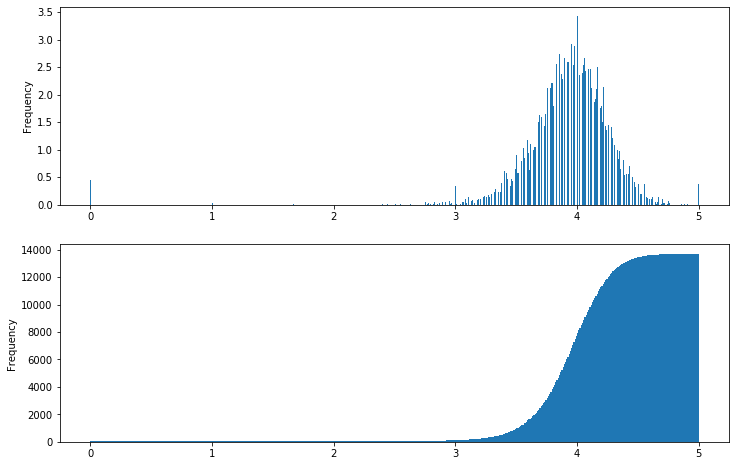

In [8]:
#for column "avr_rate"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
# Plot the PDF
data['avr_rate'].plot(ax = axes[0], kind = 'hist', normed = True, bins = 900, range = (0, 5))
# Plot the CDF
data['avr_rate'].plot(ax = axes[1], kind = 'hist', cumulative = True, bins = 10000, range = (0, 5))

#### PDF and CDF for column "ratings"

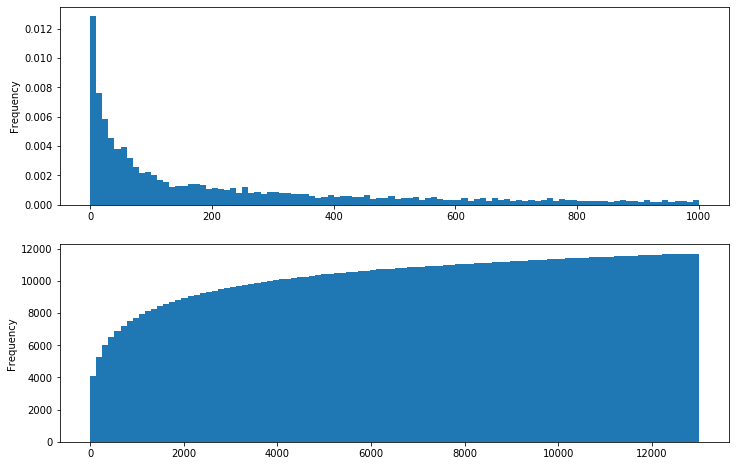

In [9]:
#for column "ratings"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
# Plot the PDF
data['ratings'].plot(ax = axes[0], kind = 'hist', normed = True, bins = 100, range = (0, 1000))
# Plot the CDF
data['ratings'].plot(ax = axes[1], kind = 'hist', cumulative = True, bins = 100, range = (0, 13000))

#### PDF and CDF for column "text_reviews"

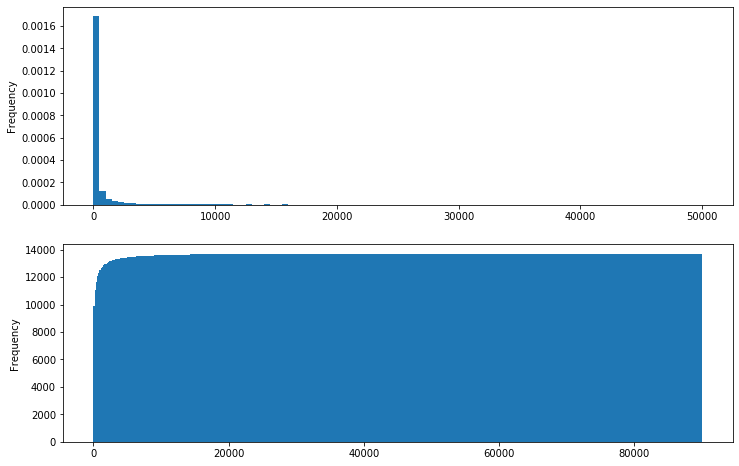

In [10]:
#for column "text_reviews"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
# Plot the PDF
data['text_reviews'].plot(ax = axes[0], kind = 'hist', normed = True, bins = 100, range = (0, 50000))
# Plot the CDF
data['text_reviews'].plot(ax = axes[1], kind = 'hist', cumulative = True, bins = 500, range = (0, 90000))

### According to exercise
the distribution of heights is roughly normal 
with parameters µ = 3.93 cm and σ = 0.36
(as we can see in describe() method output of average ratings)

###### mean value 3.93, median - 3.96, standart deviation - 0.36

#### scipy.stats.norm represents a normal distribution

In [11]:
mu = 3.93  #mean
sigma = 0.36  #standart deviation
dist = scipy.stats.norm(loc = mu, scale = sigma) #normal distribution
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

#### a "frozen random variable" can compute its 
#### mean and standard deviation

In [12]:
dist.mean(), dist.std()

(3.93, 0.36)

##### It can also evaluate its CDF

In [13]:
dist.cdf(mu - sigma)

0.15865525393145713

##### how many books are between 1.22 and 4.89?
##### in general
0 - lowest average rating
5 - highest average rating

In [14]:
low = dist.cdf(1.22)    # 1.22 - highest average rating I took
high = dist.cdf(4.89)   # 4.89 - lowest average rating I took
low, high, high -low

(2.580556487669266e-14, 0.9961696194324102, 0.9961696194323845)

### Pareto distribution
#### the parameters xmin = 1  and α = 5
#### we get a distribution with a reasonable minimum 1, 
#### and median, 1.149 ~ 1.15

#### scipy.stats.pareto represents a Pareto distribution

In [15]:
alpha = 5 # Highest
xmin = 1 # Lowest (I couldn't put zero)
dist = scipy.stats.pareto(b = alpha, scale = xmin) #Pareto
dist.median() # median in Pareto world

1.148698354997035

##### the mean average rating in Pareto world

In [16]:
dist.mean()

1.25

##### the fraction of ratings that are shorter than the mean

In [17]:
dist.cdf(dist.mean())

0.67232

### CCDF (bivariate distribution)
##### in other words
### Scatterplot
##### for average ratings values

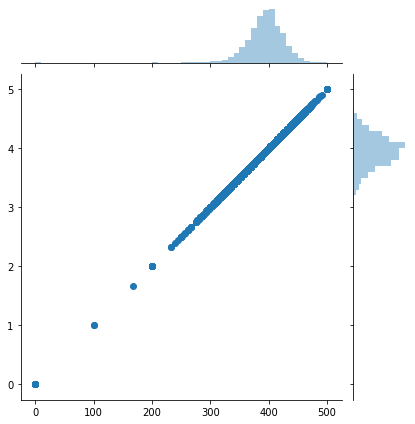

In [18]:
col_1 = list(data['avr_rate'])
col_2 = list(data['avr_rate']/0.01)

sns.jointplot(x=col_2, y=col_1)

##### Here I'm gonna show the skewness 
##### of the average ratings distribution
##### using skew() method

In [19]:
avr = data['avr_rate']
avr.skew()

-3.669112125508889

##### a measure of -3.669112125508889, meaning it's
#### skewed to the left.

### Pearson’s Median Skewness

In [20]:
P = (3 * (avr.mean() - avr.median()))/avr.std()
P

-0.24686488471150858

##### a Pearson median coefficient of -0.24686488471150858 meaning
####  it's left skewed

## Multiple pairwise bivariate distribution
### shows the relationship for each pair of columns in a dataset
### by default, it draws the univariate distribution of each variable

In [ ]:
sns.pairplot(data)

D:\3 course\anaconda\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
D:\3 course\anaconda\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


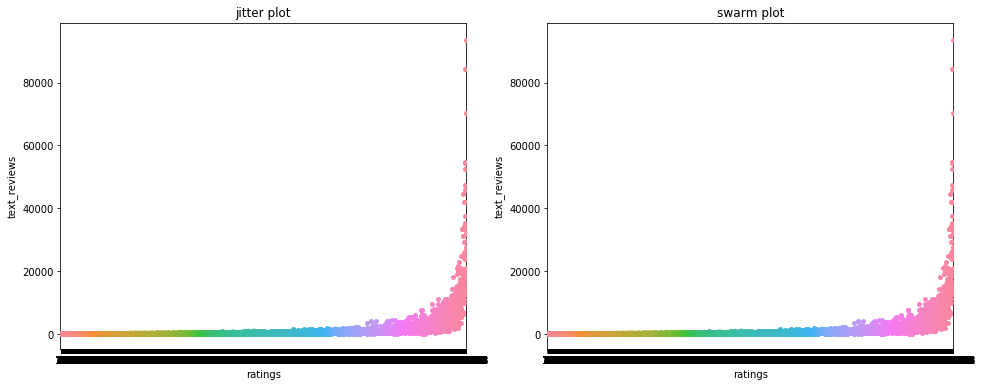

In [17]:
# Set up a figure with two axes
fig, ax = plt.subplots(1, 2)

# Set the size of the figure
fig.set_size_inches(16, 6)

# Label the axes and title the plot
ax[0].set_xlabel('expected mean')
ax[0].set_ylabel('samples drawn from gaussian')
ax[0].set_title('jitter plot')

# Make a jitter plot
sns.stripplot(data.ratings, data.text_reviews, ax=ax[0], jitter=True)

# Label the axes and title the plot
ax[1].set_xlabel('expected mean')
ax[1].set_ylabel('samples drawn from gaussian')
ax[1].set_title('swarm plot')

# Make a swarm plot
sns.swarmplot(data.ratings, data.text_reviews, ax=ax[1]);

In [18]:
cleaned = data.dropna(subset=['ratings', 'text_reviews'])

In [19]:
bins = np.arange(135, 210, 5)
indices = np.digitize(cleaned.ratings, bins)
groups = cleaned.groupby(indices)

In [24]:
mean_ratings = [group.ratings.mean() for i, group in groups]

In [81]:
groups.get_group(1)['text_reviews'].nunique()

AttributeError: 'int' object has no attribute 'sum'

In [93]:
cdfs = []
for group in groups:
    for i in group:
        data['text_reviews'].value_counts().sort_index() / len(data['text_reviews'])
        cdfs.append(group)

In [94]:
len(cdfs)

32

In [33]:
mean_ratings

[42.18775510204082,
 136.84782608695653,
 142.09615384615384,
 146.86046511627907,
 151.87234042553192,
 157.0,
 162.14814814814815,
 166.90740740740742,
 172.21818181818182,
 177.23076923076923,
 181.75925925925927,
 187.1,
 191.86363636363637,
 197.25,
 202.06976744186048,
 27419.349746478874]

In [50]:
#contains a large number of probability distributions
from scipy import stats
#scipy.stats contains objects that represent analytic distributions
import scipy.stats

In [51]:
norm_cdf = scipy.stats.norm.cdf(data['text_reviews']) # calculate the cdf - also discrete

D:\3 course\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\3 course\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\3 course\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [80]:
len(norm_cdf[0])

TypeError: object of type 'numpy.float64' has no len()